<a href="https://colab.research.google.com/github/shivaranjanimanda0266/colab-to-github/blob/main/tensile_test_stress_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 1. Load the CSV file
# (Make sure 'stress_strain_practice.csv' is uploaded to Colab)
df = pd.read_csv("stress_strain_practice.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# ---------------------------------------------
# 2. Calculate Stress (MPa)
# Stress (MPa) = Force (N) / Cross-sectional Area (mm^2)
# Note: N/mm^2 = MPa
# ---------------------------------------------
df["Stress_MPa"] = df["Force_N"] / df["Cross_Section_Area_mm2"]

# ---------------------------------------------
# 3. Calculate Strain (%)
# Strain (%) = (Elongation / Original Length) * 100
# ---------------------------------------------
df["Strain_percent"] = (df["Elongation_mm"] / df["Original_Length_mm"]) * 100

# ---------------------------------------------
# 4. Group by Material and calculate average
# stress and strain
# ---------------------------------------------
material_avg = df.groupby("Material")[["Stress_MPa", "Strain_percent"]].mean()

print("\nAverage Stress and Strain by Material:")
display(material_avg)

# ---------------------------------------------
# 5. Identify the strongest material
# (highest average stress)
# ---------------------------------------------
strongest_material = material_avg["Stress_MPa"].idxmax()
max_stress_value = material_avg["Stress_MPa"].max()

print(f"\nStrongest material based on average stress:")
print(f"{strongest_material} ({max_stress_value:.2f} MPa)")

# ---------------------------------------------
# 6. Summary statistics for stress
# min, max, and average stress for each material
# ---------------------------------------------
stress_summary = df.groupby("Material")["Stress_MPa"].agg(
    Min_Stress_MPa="min",
    Max_Stress_MPa="max",
    Avg_Stress_MPa="mean"
)

print("\nStress Summary by Material:")
display(stress_summary)

# ---------------------------------------------
# 7. Export results to a new CSV file
# ---------------------------------------------
output_file = "stress_strain_results_summary.csv"
stress_summary.to_csv(output_file)

print(f"\nResults exported successfully to '{output_file}'")

First 5 rows of the dataset:


,Test_ID,Material,Force_N,Cross_Section_Area_mm2,Elongation_mm,Original_Length_mm,Test_Date
0,T001,Steel,1749,27,0.51,100,2025-01-01
1,T002,Aluminum,2901,20,0.45,100,2025-01-02
2,T003,Copper,2463,19,0.76,100,2025-01-03
3,T004,Brass,2197,33,0.50,100,2025-01-04
4,T005,Titanium,1312,33,0.45,100,2025-01-05



Average Stress and Strain by Material:


,Stress_MPa,Strain_percent
Material,,
Aluminum,83.776627,0.550000
Brass,72.805132,0.535000
Copper,107.466696,0.545000
Steel,59.954850,0.630000
Titanium,65.957533,0.561667



Strongest material based on average stress:
Copper (107.47 MPa)

Stress Summary by Material:


,Min_Stress_MPa,Max_Stress_MPa,Avg_Stress_MPa
Material,,,
Aluminum,42.600000,145.050000,83.776627
Brass,44.500000,121.333333,72.805132
Copper,48.000000,148.000000,107.466696
Steel,43.700000,80.312500,59.954850
Titanium,39.757576,96.640000,65.957533



Results exported successfully to 'stress_strain_results_summary.csv'


First 5 rows of the dataset:


,Test_ID,Material,Force_N,Cross_Section_Area_mm2,Elongation_mm,Original_Length_mm,Test_Date
0,T001,Steel,1749,27,0.51,100,2025-01-01
1,T002,Aluminum,2901,20,0.45,100,2025-01-02
2,T003,Copper,2463,19,0.76,100,2025-01-03
3,T004,Brass,2197,33,0.50,100,2025-01-04
4,T005,Titanium,1312,33,0.45,100,2025-01-05



Missing values per column:
Test_ID                   0
Material                  0
Force_N                   0
Cross_Section_Area_mm2    0
Elongation_mm             0
Original_Length_mm        0
Test_Date                 0
dtype: int64

Data after removing rows with missing critical values:


,Test_ID,Material,Force_N,Cross_Section_Area_mm2,Elongation_mm,Original_Length_mm,Test_Date
0,T001,Steel,1749,27,0.51,100,2025-01-01
1,T002,Aluminum,2901,20,0.45,100,2025-01-02
2,T003,Copper,2463,19,0.76,100,2025-01-03
3,T004,Brass,2197,33,0.50,100,2025-01-04
4,T005,Titanium,1312,33,0.45,100,2025-01-05



Tests where stress exceeded 200 MPa:


,Test_ID,Material,Stress_MPa,Strain_percent



Average Stress and Strain by Material:


,Stress_MPa,Strain_percent
Material,,
Aluminum,83.776627,0.550000
Brass,72.805132,0.535000
Copper,107.466696,0.545000
Steel,59.954850,0.630000
Titanium,65.957533,0.561667



Strongest material (highest average stress): Copper


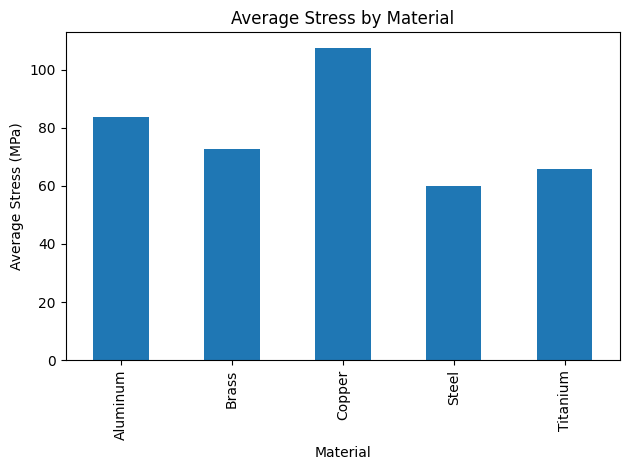


Stress Summary by Material:


,Min_Stress_MPa,Max_Stress_MPa,Avg_Stress_MPa
Material,,,
Aluminum,42.600000,145.050000,83.776627
Brass,44.500000,121.333333,72.805132
Copper,48.000000,148.000000,107.466696
Steel,43.700000,80.312500,59.954850
Titanium,39.757576,96.640000,65.957533



Results exported to 'stress_strain_results_summary.csv'


In [2]:
# ---------------------------------------------
# Stress–Strain Analysis with Visualization
# ---------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file with basic error handling
try:
    df = pd.read_csv("stress_strain_practice.csv")
except FileNotFoundError:
    raise FileNotFoundError("CSV file not found. Please upload 'stress_strain_practice.csv'.")

print("First 5 rows of the dataset:")
display(df.head())

# ---------------------------------------------
# 2. Handle missing values
# ---------------------------------------------
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=[
    "Force_N",
    "Cross_Section_Area_mm2",
    "Elongation_mm",
    "Original_Length_mm",
    "Material"
])

print("\nData after removing rows with missing critical values:")
display(df.head())

# ---------------------------------------------
# 3. Calculate Stress (MPa)
# ---------------------------------------------
df["Stress_MPa"] = df["Force_N"] / df["Cross_Section_Area_mm2"]

# ---------------------------------------------
# 4. Calculate Strain (%)
# ---------------------------------------------
df["Strain_percent"] = (df["Elongation_mm"] / df["Original_Length_mm"]) * 100

# ---------------------------------------------
# 5. Highlight tests where stress exceeded 200 MPa
# ---------------------------------------------
high_stress_tests = df[df["Stress_MPa"] > 200]

print("\nTests where stress exceeded 200 MPa:")
display(high_stress_tests[[
    "Test_ID", "Material", "Stress_MPa", "Strain_percent"
]])

# ---------------------------------------------
# 6. Group by Material – average stress & strain
# ---------------------------------------------
material_avg = df.groupby("Material")[["Stress_MPa", "Strain_percent"]].mean()

print("\nAverage Stress and Strain by Material:")
display(material_avg)

# ---------------------------------------------
# 7. Identify the strongest material
# ---------------------------------------------
strongest_material = material_avg["Stress_MPa"].idxmax()
print(f"\nStrongest material (highest average stress): {strongest_material}")

# ---------------------------------------------
# 8. Visualization: Bar chart of average stress
# ---------------------------------------------
plt.figure()
material_avg["Stress_MPa"].plot(kind="bar")
plt.xlabel("Material")
plt.ylabel("Average Stress (MPa)")
plt.title("Average Stress by Material")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 9. Stress summary statistics
# ---------------------------------------------
stress_summary = df.groupby("Material")["Stress_MPa"].agg(
    Min_Stress_MPa="min",
    Max_Stress_MPa="max",
    Avg_Stress_MPa="mean"
)

print("\nStress Summary by Material:")
display(stress_summary)

# ---------------------------------------------
# 10. Export results to CSV
# ---------------------------------------------
stress_summary.to_csv("stress_strain_results_summary.csv")

print("\nResults exported to 'stress_strain_results_summary.csv'")
